In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Mall Customer Segmentation Dataset**

It is a small dataset that used to understand the customers purchases behavior. 

In [346]:
from scipy.cluster.hierarchy import dendrogram, linkage  
import scipy.cluster.hierarchy as hcluster
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster, linkage
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler

In [347]:
df_mc = pd.read_csv("Mall_Customers.csv")
print(df_mc.shape)
df_mc.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [348]:
# check if there is missing values
df_mc.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [349]:
# encode the categorical values
label_encoder = preprocessing.LabelEncoder() 
df_mc['Gender'] = label_encoder.fit_transform(df_mc['Gender'])
df_mc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
#df_mc.set_index('CustomerID', inplace=True)

#### Steps for Hierarchical Clustering 
- Choose the number of clusters.
- Cluster the data using some hierarchical clustering algorithm (Agglomerative Clustering). 
- Create Dendrogram.

### Agglomerative Clustering

#### The Agglomerative Clustering class will require two inputs:

- **n_clusters**: The number of clusters to form ( 5 clusters ).

- **linkage**: Which linkage criterion to use (single Linkage). 

C:\Users\Gamer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



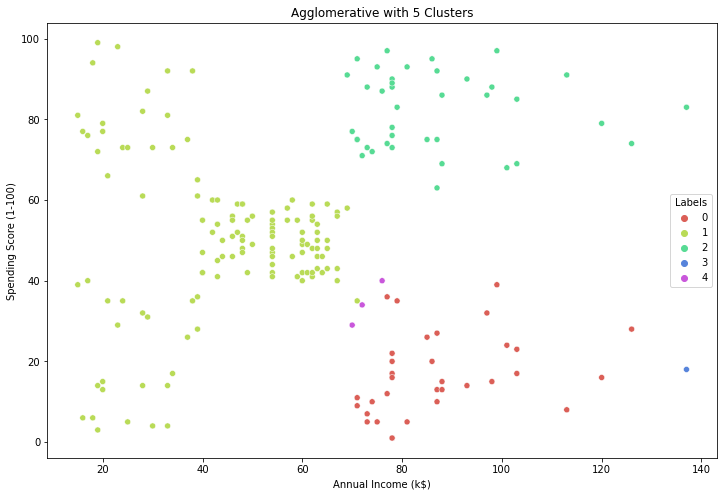

In [376]:
# fitting the data
agglom = AgglomerativeClustering(n_clusters=5, linkage='single').fit(df_mc)

#create new column to assign each data point with a cluster
df_mc['Labels'] = agglom.labels_

# Visualize the customers based on there Spending score and annual Income.
plt.figure(figsize=(12, 8))
sns.scatterplot(df_mc['Annual Income (k$)'], df_mc['Spending Score (1-100)'], hue=df_mc['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

We can see the values of [0-4] in the output since we defined 5 clusters. 0 represents the points that belong to the first cluster and 1 represents points in the second cluster, and so on.

### Dendrogram Using Euclidean distance and Single Linkage
- A dendrogram is a diagram representing a tree. 
- This diagrammatic representation is used to illustrates the arrangement of the clusters produced by the corresponding analyses.

<ipython-input-377-1056533ede45>:8: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



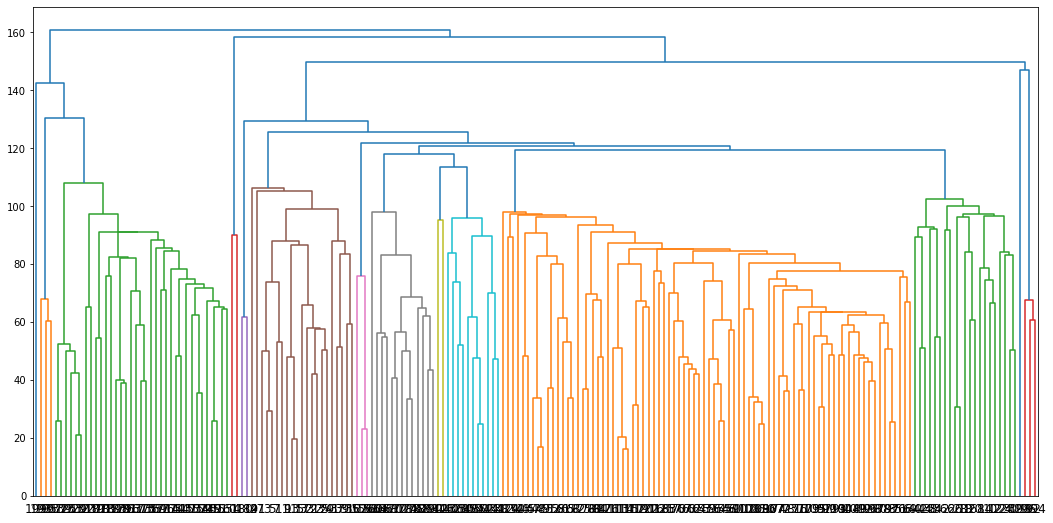

In [377]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

#calculate the distances between the dataset variables
dist = distance_matrix(df_mc, df_mc)

# Using the linkage class from hierarchy, pass in the parameters: The distance matrix and the linkage
Z = hierarchy.linkage(dist, 'single')

# plot the dendrogram
plt.figure(figsize=(18, 9))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12)

- The x-axis contains the samples and y-axis represents the distance between these samples.
- We have 10 clusters colored in the dendrogram.

-------

# **14. Repeat the process in (13) but use average linkage when applying hierarchical clustering to your datasets. Report the results and make comparisons between the results of (13) and (14).**

### Using Average Linkage

C:\Users\Gamer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



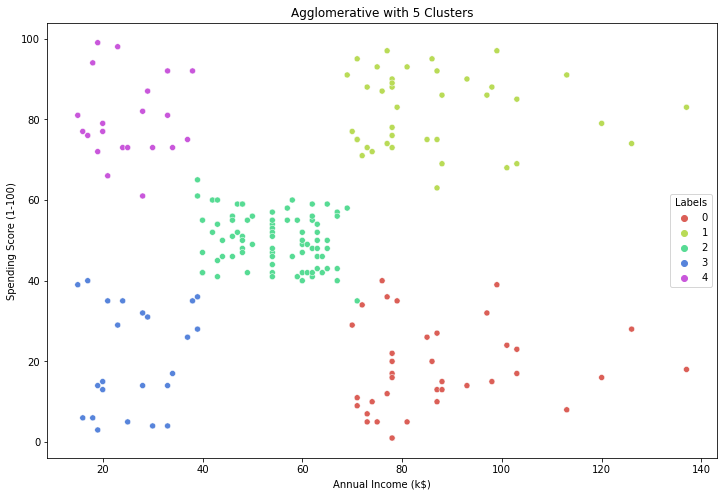

In [368]:
# fitting the data
agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(df_mc)

#create new column to assign each data point with a cluster
df_mc['Labels'] = agglom.labels_

# Visualize the customers based on there Spending score and annual Income
plt.figure(figsize=(12, 8))
sns.scatterplot(df_mc['Annual Income (k$)'], df_mc['Spending Score (1-100)'], hue=df_mc['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

### Dendrogram Associated for the Agglomerative Hierarchical Clustering

<ipython-input-374-ccdc0deaff91>:7: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



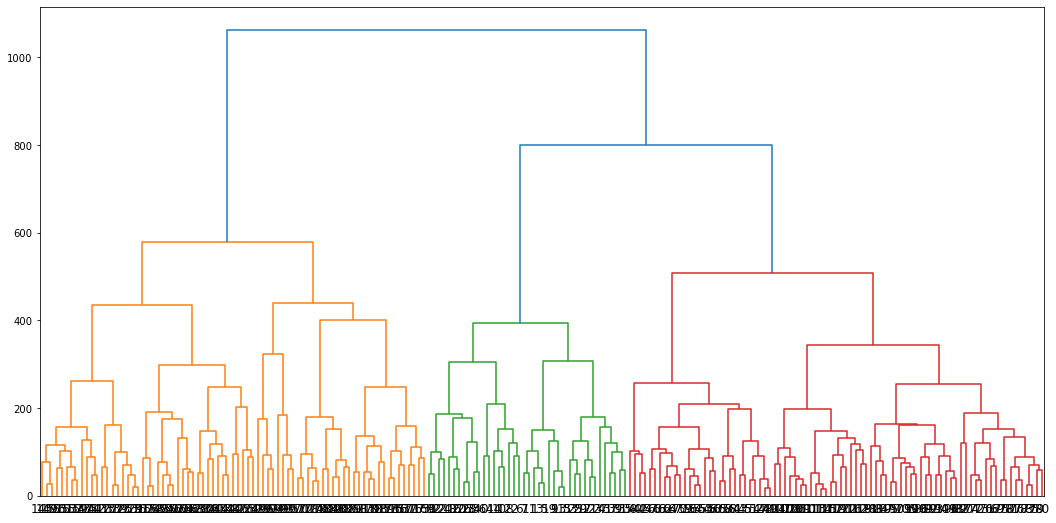

In [374]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

#calculate the distances between the dataset variables
dist = distance_matrix(df_mc, df_mc)

# Using the linkage class from hierarchy, pass in the parameters: The distance matrix and the linkage
Z = hierarchy.linkage(dist, 'average')

# plot the dendrogram
plt.figure(figsize=(18, 9))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12)

- The x-axis contains the samples and y-axis represents the distance between these samples.
- We have 3 clusters colored in the dendrogram.

#### Comparison between the clusters
- Using single linkage, the dataset not clearly clustered.
- It also divided the data into many clusters in the dendrogram.
- According to the graphs, the average linkage has a clear clusters to group the data.
- It is better to consider the Average Linkage in this case.

-------